# Titanic Classification

#### Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

### Importing the libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


%matplotlib inline


### Creating the data frame using titanic.csv

In [2]:
#creating the data frame
titanic_data = pd.read_csv("titanic.csv")
#checking the shape
print(titanic_data.shape)
#checking the information about data frame, weather the data has null values or not
titanic_data.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Before Cleaning

In [3]:
# To check the number of missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### After Cleaning

In [4]:
# Dropping the "Cabin" column from the dataframe because cabin has more than 30% null values.
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

# Replacing the missing vlaues in "Age" column with mean 
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# Replacing the missing values in "Embarked" column with the mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis

In [5]:
# Finding the number of people survived and not survived based on Gender!
titanic_data[['Sex', 'Survived']].value_counts()

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

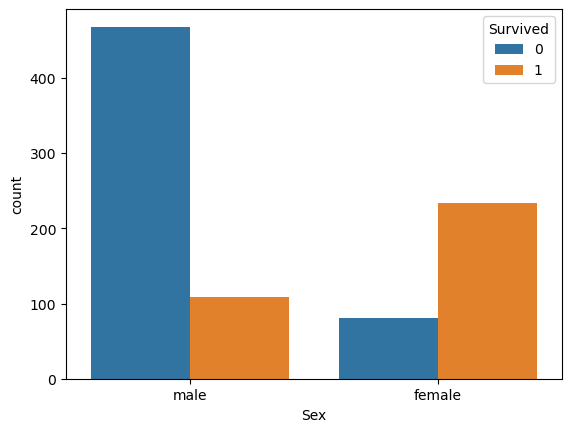

In [6]:
# Number of survivors by Gender wise
sns.countplot(x="Sex", hue="Survived", data=titanic_data)

In [7]:
# Finding the number of people survived and not survived based on Passenger Class!
titanic_data[['Pclass', 'Survived']].value_counts()

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

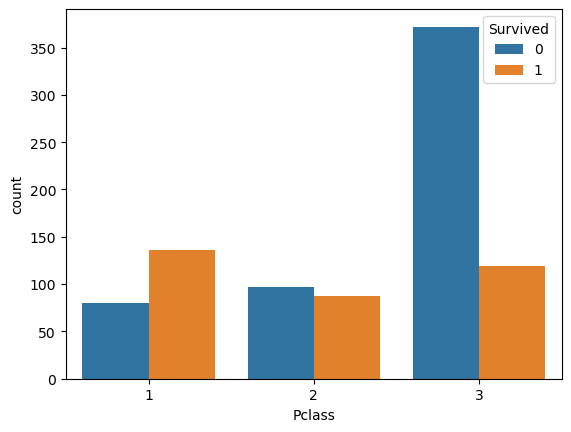

In [8]:
# Number of Survivers by Pclass wise 
sns.countplot(x="Pclass", hue="Survived", data=titanic_data)

### Data Preprocessing

In [9]:
titanic_data["Sex"] = LabelEncoder().fit_transform(titanic_data["Sex"])
titanic_data["Embarked"] = LabelEncoder().fit_transform(titanic_data["Embarked"])

### Selecting the required columns for performing operations on data

In [10]:
X = titanic_data[["Pclass", "Sex", "Age", "SibSp","Parch","Fare","Embarked"]]
y = titanic_data['Survived']

print(X)
print("\n")
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


### Splitting the sheet into Training and Testing Datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(f"Train: {X.shape}, {X_train.shape}, {y_train.shape}")
print(f"Test: {X.shape}, {X_test.shape}, {y_test.shape}")

Train: (891, 7), (712, 7), (712,)
Test: (891, 7), (179, 7), (179,)


### Checking the Scores of the Models

In [12]:
# Defining scoring metric for SVC, Gaussian Navie Bayes , Random Forest
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 5, n_jobs = -1, scoring = cv_scoring, error_score='raise')
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")



SVC
Scores: [0.59776536 0.71348315 0.69101124 0.68539326 0.69101124]
Mean Score: 0.6757328479065972
Gaussian NB
Scores: [0.77094972 0.79213483 0.78651685 0.80337079 0.80337079]
Mean Score: 0.7912685958194715
Random Forest
Scores: [0.77653631 0.80337079 0.87078652 0.78089888 0.81460674]
Mean Score: 0.8092398468394952


### Training the model and testing the accuracy of the model by using  SVM Classifier,Naive Bayes Classifier, Random Forest Classifier

Accuracy on train data by SVM Classifier: 67.97752808988764
Accuracy on test data by SVM Classifier: 63.687150837988824


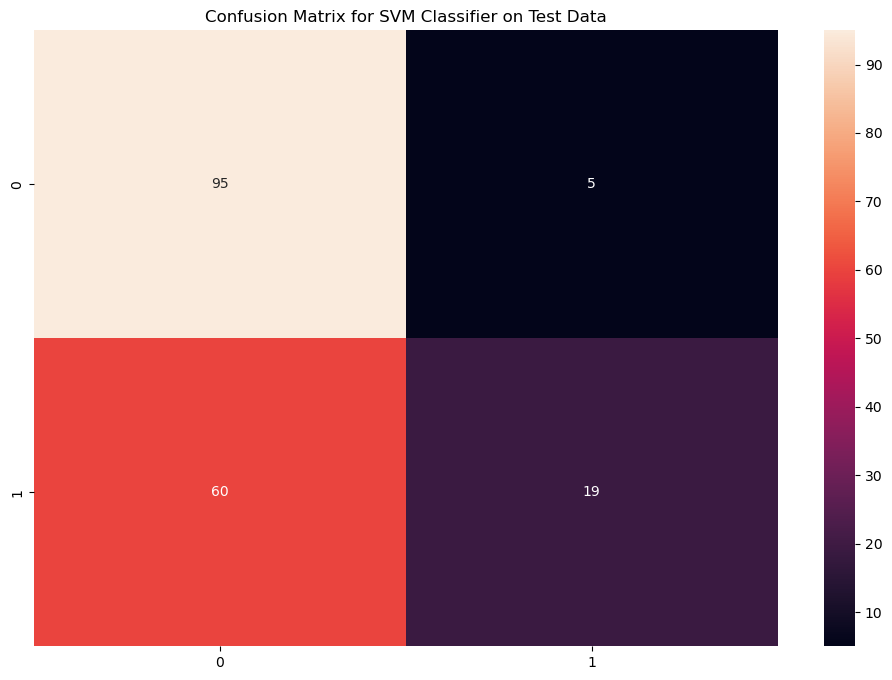

Accuracy on train data by Naive Bayes Classifier: 79.49438202247191
Accuracy on test data by Naive Bayes Classifier: 77.09497206703911


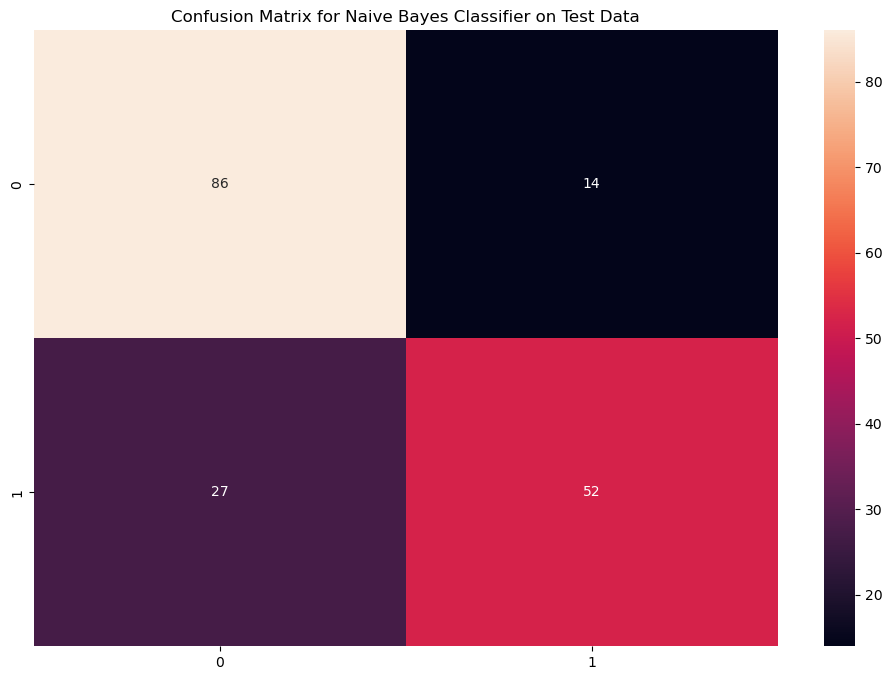

Accuracy on train data by Random Forest Classifier: 98.59550561797754
Accuracy on test data by Random Forest Classifier: 82.12290502793296


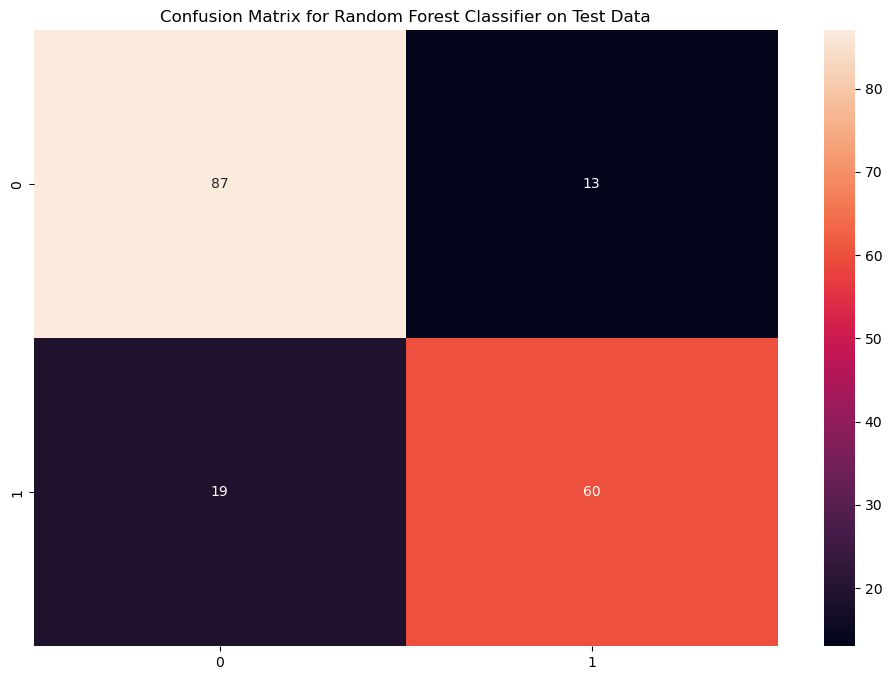

In [13]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()


# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()


# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


### Testing the model

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

# Define preprocessing for numeric features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

# Define preprocessing for categorical features
categorical_features = ['Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Fit the pipeline to training data
pipeline.fit(X_train, y_train)

# Example input data
input_data = {
    "Pclass": [1],
    "Sex": ["female"],
    "Age": [22],
    "SibSp": [1],
    "Parch": [0],
    "Fare": [7.25],
    "Embarked": ["S"]
}

import pandas as pd

# Convert input data dictionary to DataFrame
input_df = pd.DataFrame(input_data)

# Predict survival using the trained model
prediction = pipeline.predict(input_df)

# Print the prediction
if prediction[0] == 1:
    print("The person is predicted to survive.")
else:
    print("The person is predicted not to survive.")


The person is predicted not to survive.
